1. Understand prob statement
2. identify problem like regg,classi,clustering.
3. understant the data
   - eda: in eda only we know how good is our data how to preprocess it and all.
4. preprocessing
   - data cleaing
   - outlier treatment
   - label encoding
   - etc
5. scaling data
6. checking correlation
7. prediction
8. model evaluation
9. hyper parameter tuning


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
#%matplotlib inline

In [3]:
pip install openpyxl --upgrade

Note: you may need to restart the kernel to use updated packages.


In [4]:
df=pd.read_excel('data_preprocessing.xlsx')

In [5]:
df.head()

,Dept,Age,Experience,Salary,Education,Projects
0,HR,32.0,9,40000.0,Under_Graduate,0.0
1,HR,33.0,12,48000.0,Master,0.0
2,IT,35.0,12,45000.0,Master,5.0
3,IT,NaN,12,46000.0,Graduate,5.0
4,HR,34.0,11,NaN,Graduate,2.0


In [6]:
df.tail(2)

,Dept,Age,Experience,Salary,Education,Projects
31,Marketing,75.0,50,39000.0,Master,1.0
32,HR,NaN,11,42000.0,?,2.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        31 non-null     object 
 1   Age         30 non-null     float64
 2   Experience  29 non-null     object 
 3   Salary      31 non-null     float64
 4   Education   31 non-null     object 
 5   Projects    27 non-null     float64
dtypes: float64(3), object(3)
memory usage: 1.7+ KB


In [8]:
df.describe()

,Age,Salary,Projects
count,30.000000,31.000000,27.000000
mean,37.333333,41983.870968,2.148148
std,18.690461,15998.168578,1.261980
min,0.000000,20000.000000,0.000000
25%,29.500000,35500.000000,1.000000
50%,34.500000,42000.000000,2.000000
75%,48.750000,45250.000000,3.000000
max,75.000000,90000.000000,5.000000


In [9]:
df.describe(include='O')

,Dept,Experience,Education
count,31,29,31
unique,4,15,5
top,HR,12,Master
freq,13,6,12


In [10]:
df.isnull().mean() * 100
# % missing values

Dept           6.060606
Age            9.090909
Experience    12.121212
Salary         6.060606
Education      6.060606
Projects      18.181818
dtype: float64

In [11]:
df.isnull().sum().sum()
# total no of missing values.

19

In [12]:
df1=df.copy()

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        31 non-null     object 
 1   Age         30 non-null     float64
 2   Experience  29 non-null     object 
 3   Salary      31 non-null     float64
 4   Education   31 non-null     object 
 5   Projects    27 non-null     float64
dtypes: float64(3), object(3)
memory usage: 1.7+ KB


In [14]:
df1.Age=df1.Age.fillna(df1.Age.mean())

In [15]:
df1.Salary=df1.Salary.fillna(df1.Salary.median())
df1.Experience=df1.Experience.replace('.',np.nan).replace('%',np.nan).replace('a',np.nan)
df1.Experience=df1.Experience.astype('float')
df1.Experience=df1.Experience.fillna(df1.Experience.median())

In [16]:
df1.Projects=df1.Projects.fillna(df1.Projects.median())

In [17]:
df1.Dept=df1.Dept.fillna(df1.Dept.mode()[0])

In [18]:
df1.Education=df1.Education.replace('a',np.nan).replace('?',np.nan)
df1.Education=df1.Education.fillna(df1.Education.mode()[0])

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        33 non-null     object 
 1   Age         33 non-null     float64
 2   Experience  33 non-null     float64
 3   Salary      33 non-null     float64
 4   Education   33 non-null     object 
 5   Projects    33 non-null     float64
dtypes: float64(4), object(2)
memory usage: 1.7+ KB


In [20]:
df1.Age.unique()
# Age 0 is not a valid value

array([32.        , 33.        , 35.        , 37.33333333, 34.        ,
       56.        , 31.        , 45.        , 50.        , 75.        ,
       29.        , 38.        ,  0.        , 42.        , 52.        ,
       27.        , 51.        , 28.        , 70.        , 19.        ])

In [21]:
df1.Age=df1.Age.replace(0,df1.Age.mean())

In [22]:
df1.Age.unique()

array([32.        , 33.        , 35.        , 37.33333333, 34.        ,
       56.        , 31.        , 45.        , 50.        , 75.        ,
       29.        , 38.        , 42.        , 52.        , 27.        ,
       51.        , 28.        , 70.        , 19.        ])

### Impute all categorical coll all together.

In [23]:
categorical_cols=df1.select_dtypes(include='object').columns.to_list()
categorical_cols

['Dept', 'Education']

In [24]:
df1[categorical_cols]=df1[categorical_cols].fillna(df1[categorical_cols].mode().iloc[0])

In [25]:
df1[categorical_cols].mode().iloc[0]

Dept             HR
Education    Master
Name: 0, dtype: object

### Impute all numerical col all together.

In [26]:
numerical_cols=df1.select_dtypes(exclude='object').columns.to_list()
numerical_cols

['Age', 'Experience', 'Salary', 'Projects']

In [27]:
df1[numerical_cols]=df1[numerical_cols].fillna(df1[numerical_cols].median())

In [28]:
df1[numerical_cols].median()

Age              37.333333
Experience       12.000000
Salary        42000.000000
Projects          2.000000
dtype: float64

### drop a columns

In [29]:
df2=df1.copy()

In [30]:
df2.drop(columns=['Projects'],inplace=True)

In [31]:
df2.head()

,Dept,Age,Experience,Salary,Education
0,HR,32.000000,9.0,40000.0,Under_Graduate
1,HR,33.000000,12.0,48000.0,Master
2,IT,35.000000,12.0,45000.0,Master
3,IT,37.333333,12.0,46000.0,Graduate
4,HR,34.000000,11.0,42000.0,Graduate


### Drop missing values

In [32]:
df2.dropna(inplace=True)

### Outlier Treatment

<Axes: >

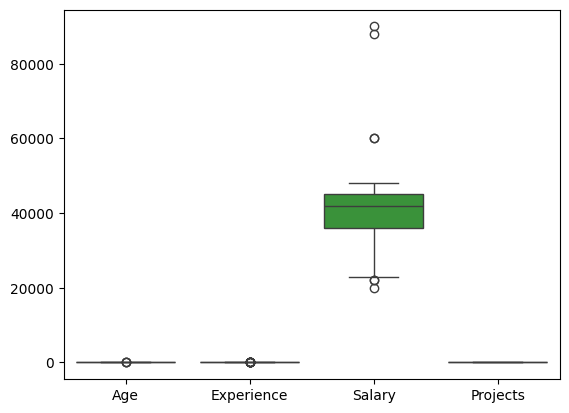

In [33]:
sns.boxplot(df1)

1. either we can drop outlier
2. or we can capp

In [34]:
# IQR Method

q1=df1.select_dtypes(exclude='object').quantile(.25)
q3=df1.select_dtypes(exclude='object').quantile(.75)
iqr=q3-q1
ul=(q3+1.5*iqr)
ll=(q1-1.5*iqr)

ul

Age              64.5
Experience       13.5
Salary        58500.0
Projects          6.0
dtype: float64

In [35]:
ll

Age              12.5
Experience        9.5
Salary        22500.0
Projects         -2.0
dtype: float64

### Removeable of outlier

In [36]:
df2=df1.select_dtypes(exclude='object')[~((df1.select_dtypes(exclude='object')<(ll))|(df1.select_dtypes(exclude='object')>(ul))).any(axis=1)].copy()

In [37]:
df2

,Age,Experience,Salary,Projects
1,33.000000,12.0,48000.0,0.0
2,35.000000,12.0,45000.0,5.0
3,37.333333,12.0,46000.0,5.0
4,34.000000,11.0,42000.0,2.0
5,33.000000,13.0,42000.0,1.0
6,56.000000,12.0,39000.0,2.0
7,37.333333,10.0,42000.0,2.0
8,31.000000,12.0,36000.0,2.0
10,50.000000,12.0,46000.0,3.0
13,32.000000,11.0,39000.0,2.0


### Capping approch

In [38]:
df3=df1.select_dtypes(exclude='object').copy()

In [39]:
df3['Age']=np.where(df3['Age']>ul['Age'],ul['Age'],np.where(df3['Age']<ll['Age'],ll['Age'],df3['Age']))

In [40]:
df3['Experience']=np.where(df3['Experience']>ul['Experience'],ul['Experience'],np.where(df3['Experience']<ll['Experience'],ll['Experience'],df3['Experience']))
df3['Salary']=np.where(df3['Salary']>ul['Salary'],ul['Salary'],np.where(df3['Salary']<ll['Salary'],ll['Salary'],df3['Salary']))
df3['Projects']=np.where(df3['Projects']>ul['Projects'],ul['Projects'],np.where(df3['Projects']<ll['Projects'],ll['Projects'],df3['Projects']))




<Axes: >

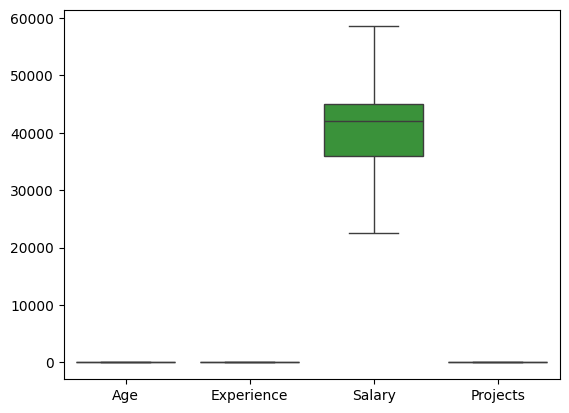

In [41]:
sns.boxplot(df3)

In [42]:
# num_cols=["Age","Experience","Salary","Projects"]
# df6=df1.copy()
# df6[num_cols]=np.where(df6[num_cols]>ul,ul,np.where(df6[num_cols]<ll,ll,df6[num_cols]))

### Z-Score method

ul = mue + 3 * sigma

ll = mue - 3 * sigma

In [43]:
df4=df1.select_dtypes(exclude='object').copy()

In [44]:
ul=df4.mean() + 3* df4.std()
ll=df4.mean() - 3* df4.std()

In [45]:
ul

Age              80.304298
Experience       44.985484
Salary        88455.330318
Projects          5.538248
dtype: float64

In [46]:
ll

Age              1.150248
Experience     -18.712757
Salary       -4485.633348
Projects        -1.295824
dtype: float64

### Encoding

In [47]:
df5=df1.copy()

In [48]:
# astype approch
df5['Education']=df5['Education'].astype('category').cat.codes

In [49]:
df5.head()

,Dept,Age,Experience,Salary,Education,Projects
0,HR,32.000000,9.0,40000.0,2,0.0
1,HR,33.000000,12.0,48000.0,1,0.0
2,IT,35.000000,12.0,45000.0,1,5.0
3,IT,37.333333,12.0,46000.0,0,5.0
4,HR,34.000000,11.0,42000.0,0,2.0


In [50]:
#pip install scikit-learn

In [51]:
df6=df1.copy()

In [52]:
# label encoder approch

from sklearn import preprocessing

label=preprocessing.LabelEncoder()

df6.Dept=label.fit_transform(df6.Dept)


In [53]:
df6.head()

,Dept,Age,Experience,Salary,Education,Projects
0,0,32.000000,9.0,40000.0,Under_Graduate,0.0
1,0,33.000000,12.0,48000.0,Master,0.0
2,1,35.000000,12.0,45000.0,Master,5.0
3,1,37.333333,12.0,46000.0,Graduate,5.0
4,0,34.000000,11.0,42000.0,Graduate,2.0


In [54]:
df6.Dept.unique()

array([0, 1, 2, 3])

In [55]:
# mapping approach : this valid if we need to give weightage our own way (business logic) on nominal data.
df8=df1.copy()

In [56]:
df8["Education"]=df8["Education"].map({"Under_Graduate":0,"Graduate":1,"Master":2})

In [57]:
df8.head()

,Dept,Age,Experience,Salary,Education,Projects
0,HR,32.000000,9.0,40000.0,0,0.0
1,HR,33.000000,12.0,48000.0,2,0.0
2,IT,35.000000,12.0,45000.0,2,5.0
3,IT,37.333333,12.0,46000.0,1,5.0
4,HR,34.000000,11.0,42000.0,1,2.0


#### Label encoding and astype encoding is only suitable on ordinal column coz model will give more weightage to higher value.

In [58]:
# one hot encoding approch

df7=df1.copy()

In [59]:
df7=pd.get_dummies(df7,columns=['Dept','Education'],dtype=int)

In [60]:
df7.head()

,Age,Experience,Salary,Projects,Dept_HR,Dept_IT,Dept_Marketing,Dept_Sales,Education_Graduate,Education_Master,Education_Under_Graduate
0,32.000000,9.0,40000.0,0.0,1,0,0,0,0,0,1
1,33.000000,12.0,48000.0,0.0,1,0,0,0,0,1,0
2,35.000000,12.0,45000.0,5.0,0,1,0,0,0,1,0
3,37.333333,12.0,46000.0,5.0,0,1,0,0,1,0,0
4,34.000000,11.0,42000.0,2.0,1,0,0,0,1,0,0


In [61]:
# If the is 3 category one 2 is required ML model will automatically identify other category. so we use  drop_first=True else multi colenearity will cause.
df9=df1.copy()
df9=pd.get_dummies(df9,columns=["Dept","Education"],prefix=["D","Edu"],drop_first=True)

In [62]:
df_car=pd.read_csv('car_performance.csv')

In [63]:
df_car.head()

,origin,cylinders,model_year,mpg_level,car_company,mpg,displacement,horsepower,weight,acceleration
0,usa,8,70,medium,chevrolet,18.0,307.0,130.0,3504,12.0
1,usa,8,70,low,buick,15.0,350.0,165.0,3693,11.5
2,usa,8,70,medium,plymouth,18.0,318.0,150.0,3436,11.0
3,usa,8,70,low,amc,16.0,304.0,150.0,3433,12.0
4,usa,8,70,medium,ford,17.0,302.0,140.0,3449,10.5


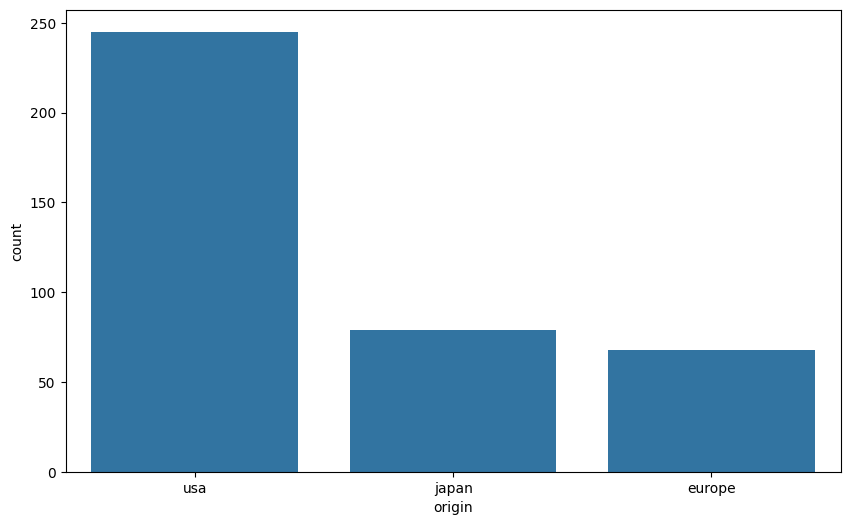

In [68]:
#Count plot
plt.figure(figsize=(10,6))
sns.countplot(data=df_car,x='origin')
plt.show()

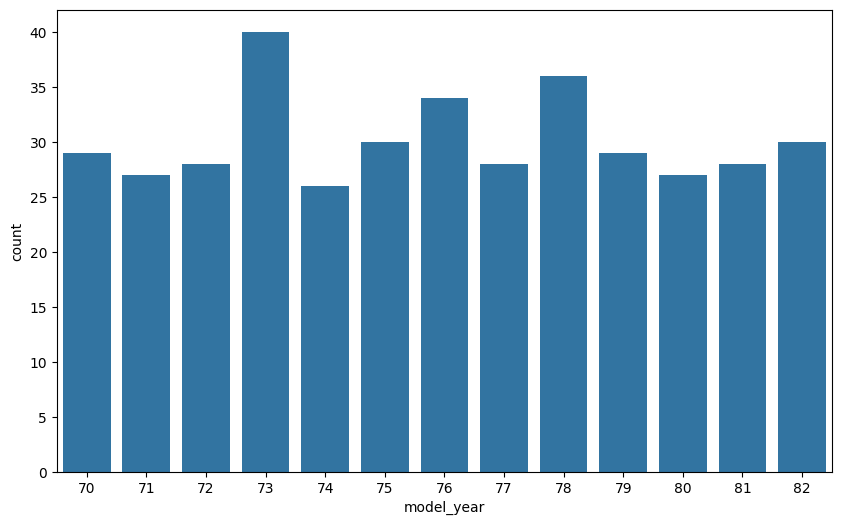

In [70]:
#Count plot
plt.figure(figsize=(10,6))
sns.countplot(data=df_car,x='model_year')
plt.show()

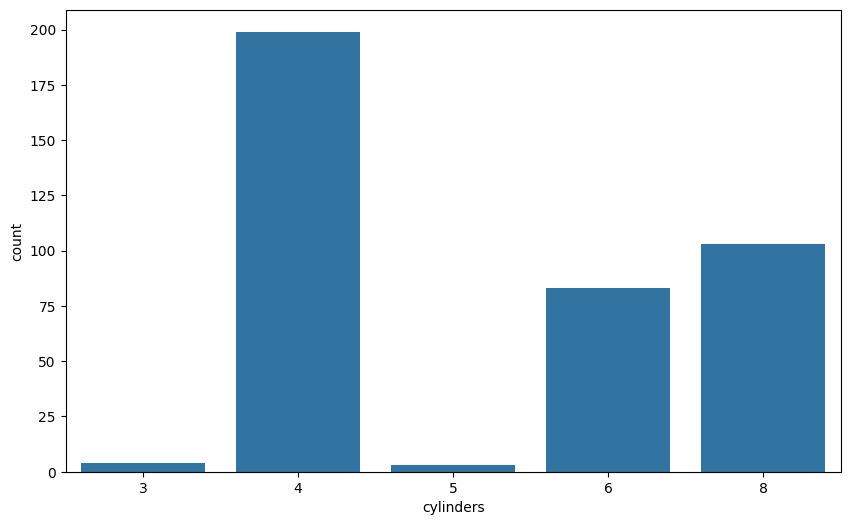

In [71]:
#Count plot
plt.figure(figsize=(10,6))
sns.countplot(data=df_car,x='cylinders')
plt.show()

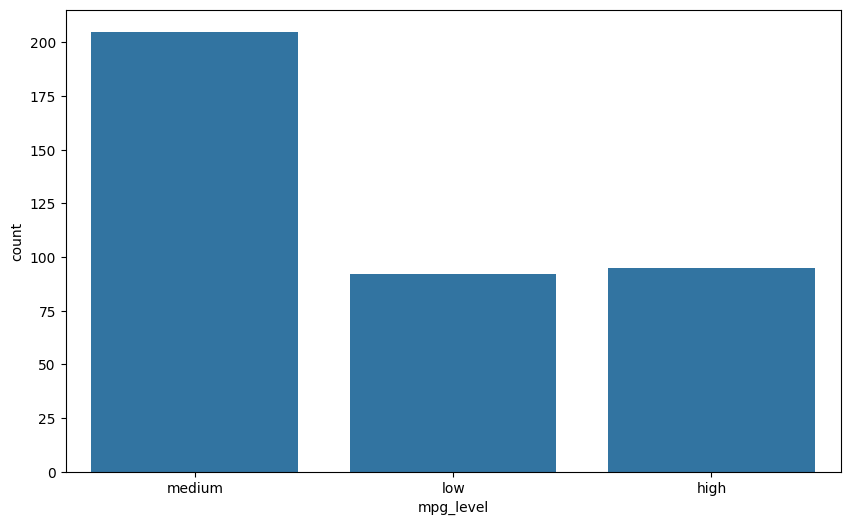

In [72]:
#Count plot
plt.figure(figsize=(10,6))
sns.countplot(data=df_car,x='mpg_level')
plt.show()

In [73]:
df_car.head()

,origin,cylinders,model_year,mpg_level,car_company,mpg,displacement,horsepower,weight,acceleration
0,usa,8,70,medium,chevrolet,18.0,307.0,130.0,3504,12.0
1,usa,8,70,low,buick,15.0,350.0,165.0,3693,11.5
2,usa,8,70,medium,plymouth,18.0,318.0,150.0,3436,11.0
3,usa,8,70,low,amc,16.0,304.0,150.0,3433,12.0
4,usa,8,70,medium,ford,17.0,302.0,140.0,3449,10.5


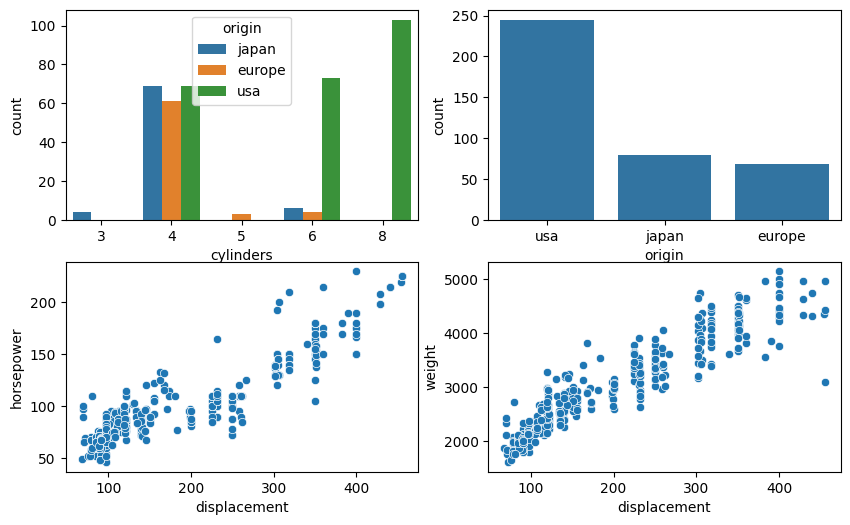

In [83]:
plt.subplots(2,2,figsize=(10,6))
plt.subplot(2,2,1)
sns.countplot(data=df_car,x='cylinders',hue='origin')
plt.subplot(2,2,2)
sns.countplot(data=df_car,x='origin')
plt.subplot(2,2,3)
sns.scatterplot(data=df_car,x='displacement',y='horsepower')
plt.subplot(2,2,4)
sns.scatterplot(data=df_car,x='displacement',y='weight')
plt.show()

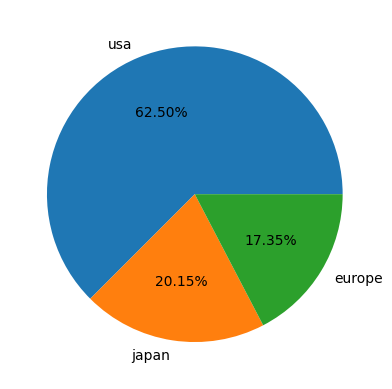

In [82]:
plt.pie(x=df_car.origin.value_counts(),labels=df_car.origin.value_counts().index,autopct='%1.2f%%')
plt.show()

<Axes: xlabel='mpg_level', ylabel='count'>

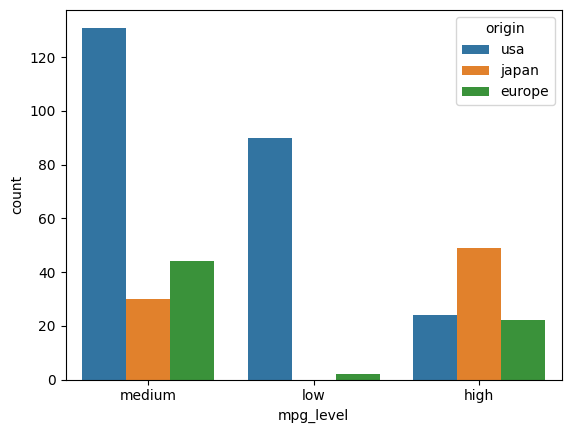

In [84]:
sns.countplot(data=df_car,x='mpg_level',hue='origin')

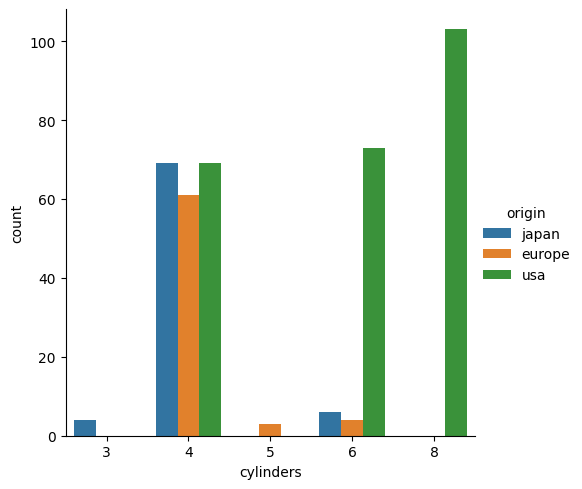

In [88]:
sns.catplot(x='cylinders',data=df_car,kind='count',hue='origin')

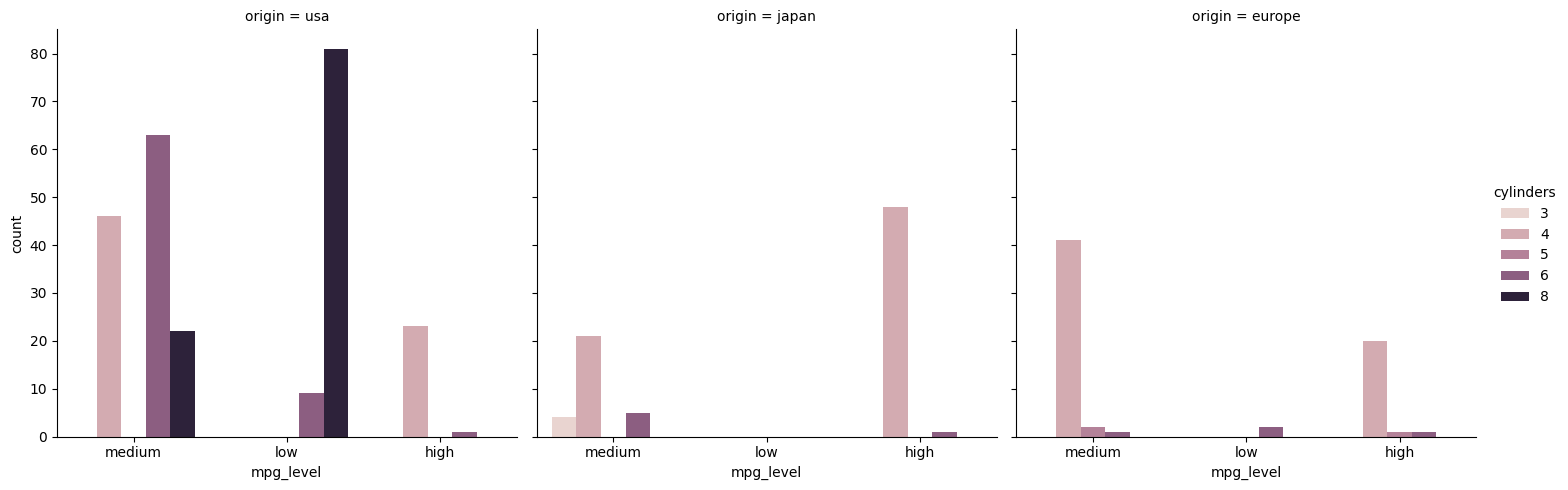

In [89]:
sns.catplot(x="mpg_level",kind="count",data=df_car,hue="cylinders",col="origin")

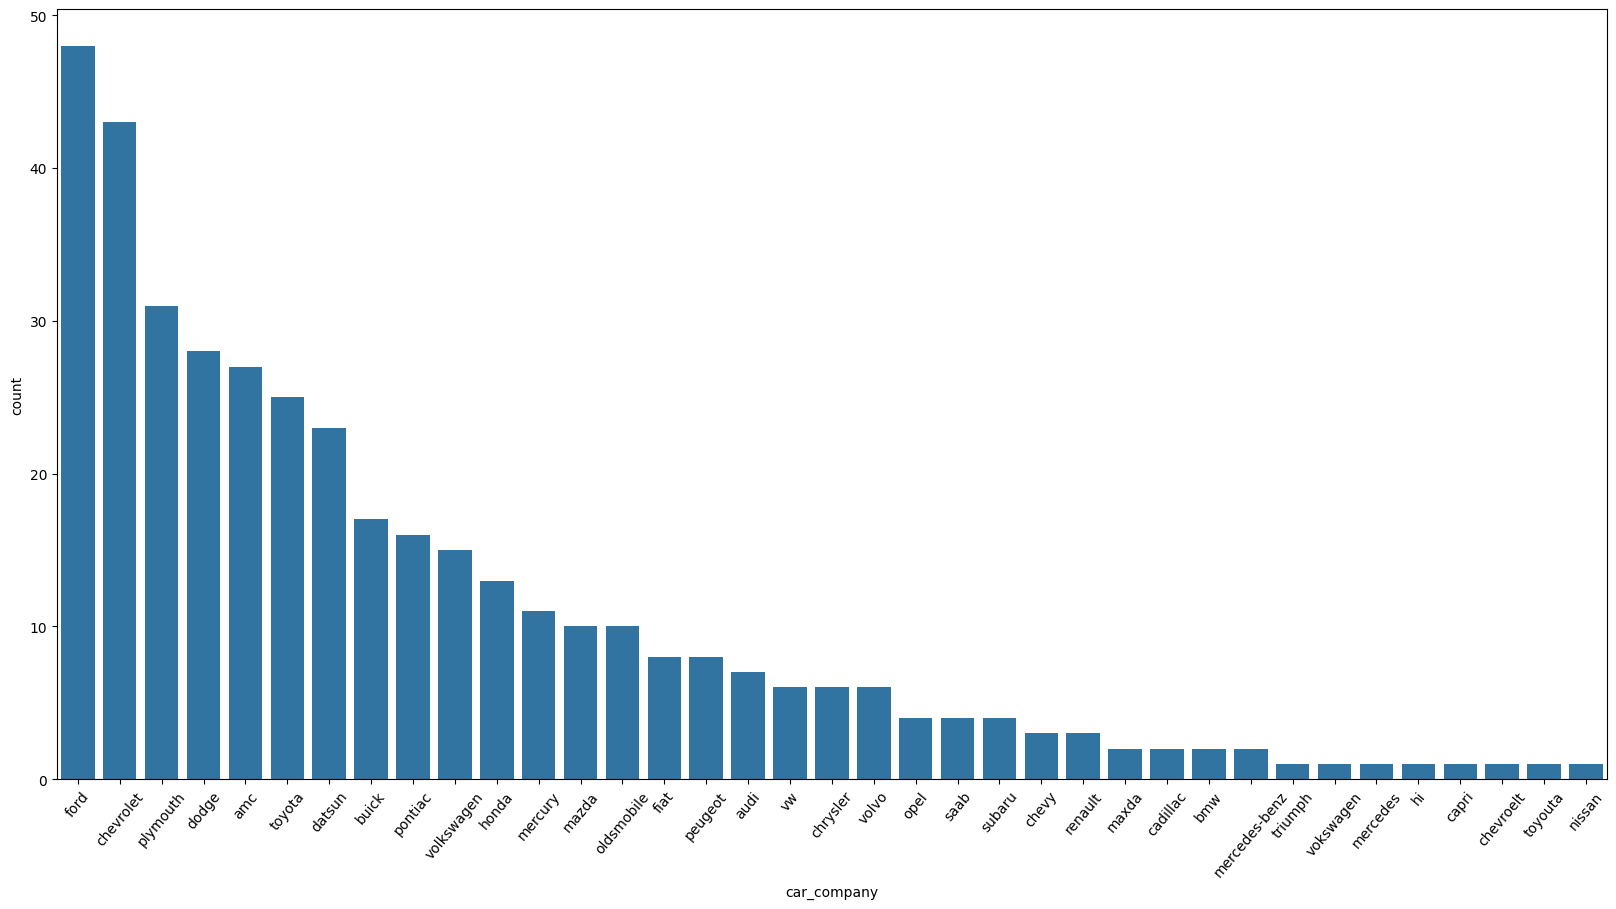

In [99]:
plt.figure(figsize=(20,10))
sns.countplot(x='car_company',data=df_car,order=df_car.car_company.value_counts().index)
plt.xticks(rotation=50)
plt.show()

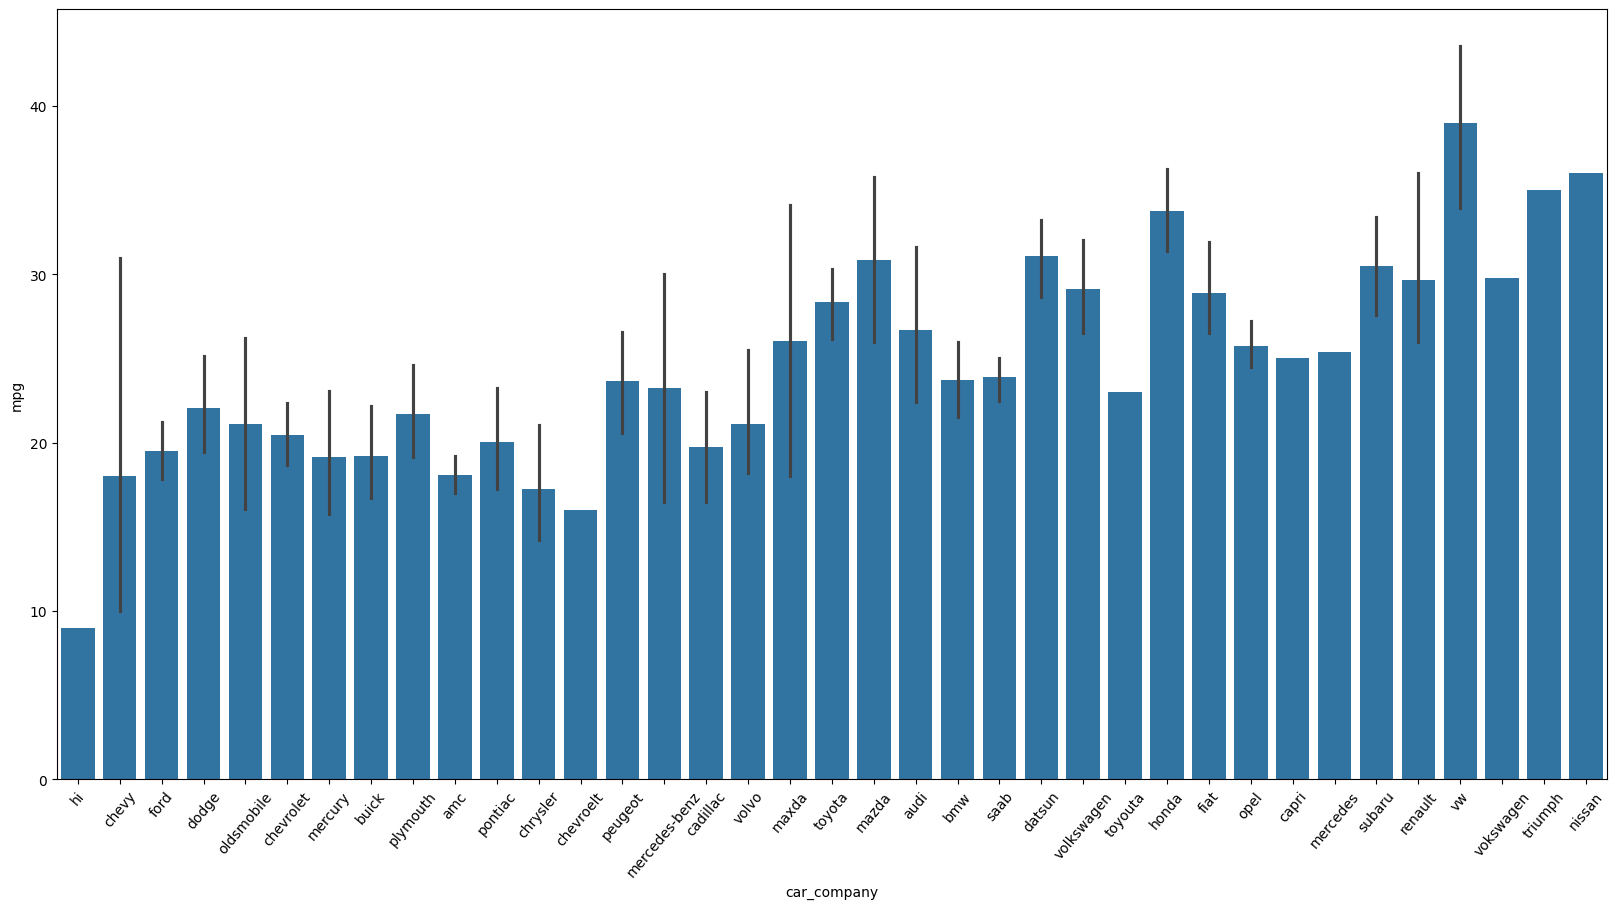

In [118]:
# barplot: categorical vs numerical

plt.figure(figsize=(20,10))
sns.barplot(x='car_company',y='mpg',data=df_car,order=df_car.sort_values(by='mpg',ascending=True).car_company)
plt.xticks(rotation=50)
plt.show()

<Axes: xlabel='model_year', ylabel='mpg'>

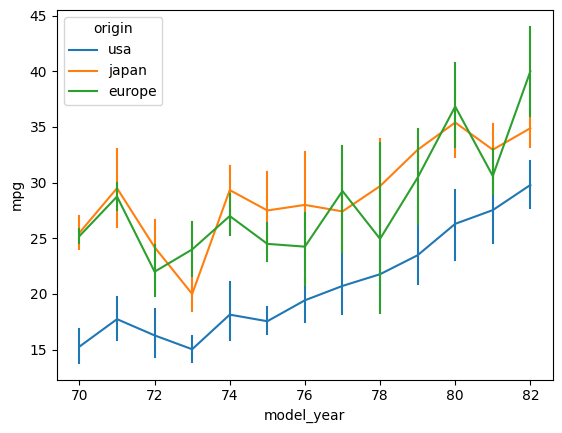

In [123]:
# actegorical vs numerical Line plot    
sns.lineplot(x='model_year',y='mpg',data=df_car,hue='origin',err_style='bars')

<Axes: xlabel='mpg', ylabel='Count'>

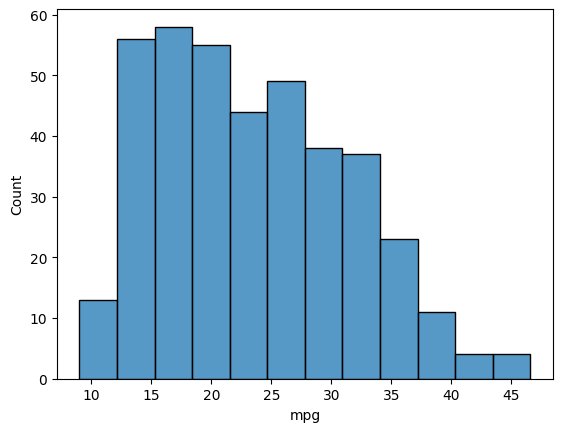

In [124]:
# histogram to check nomality of data
sns.histplot(data=df_car,x='mpg')

<Axes: xlabel='mpg', ylabel='Count'>

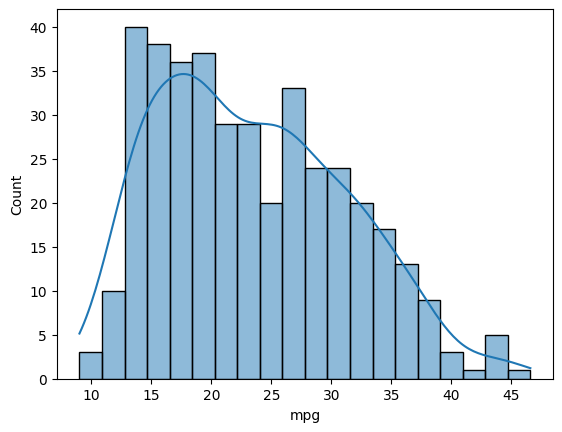

In [125]:
sns.histplot(data=df_car,x='mpg',bins=20,kde=True)

<Axes: xlabel='mpg', ylabel='Count'>

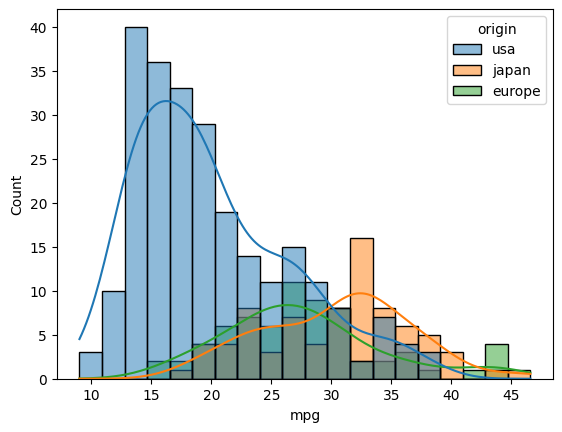

In [126]:
sns.histplot(data=df_car,x='mpg',bins=20,kde=True,hue='origin')

<Axes: xlabel='acceleration', ylabel='Count'>

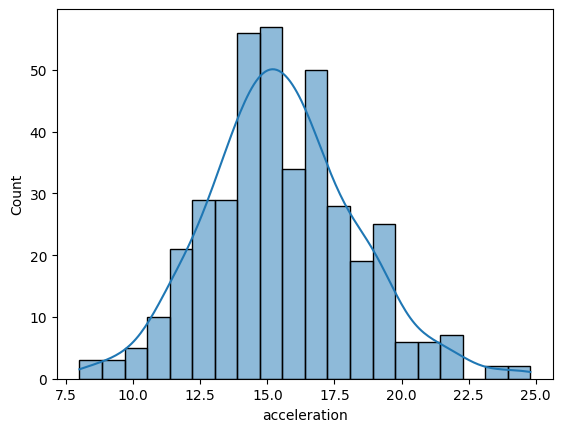

In [127]:
sns.histplot(data=df_car,x='acceleration',bins=20,kde=True)

<Axes: xlabel='acceleration'>

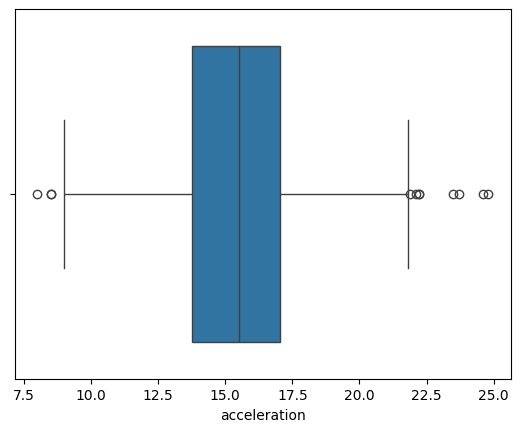

In [128]:
sns.boxplot(data=df_car,x='acceleration')

<Axes: xlabel='horsepower'>

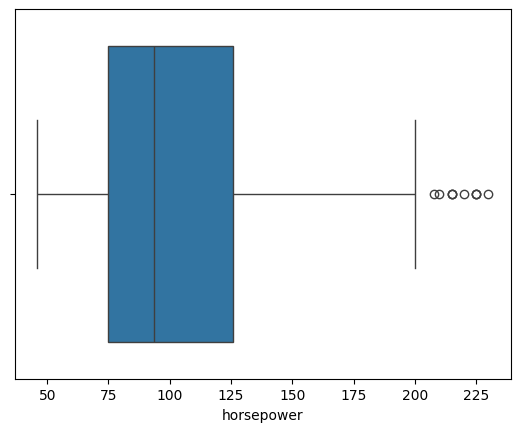

In [130]:
sns.boxplot(data=df_car,x='horsepower')

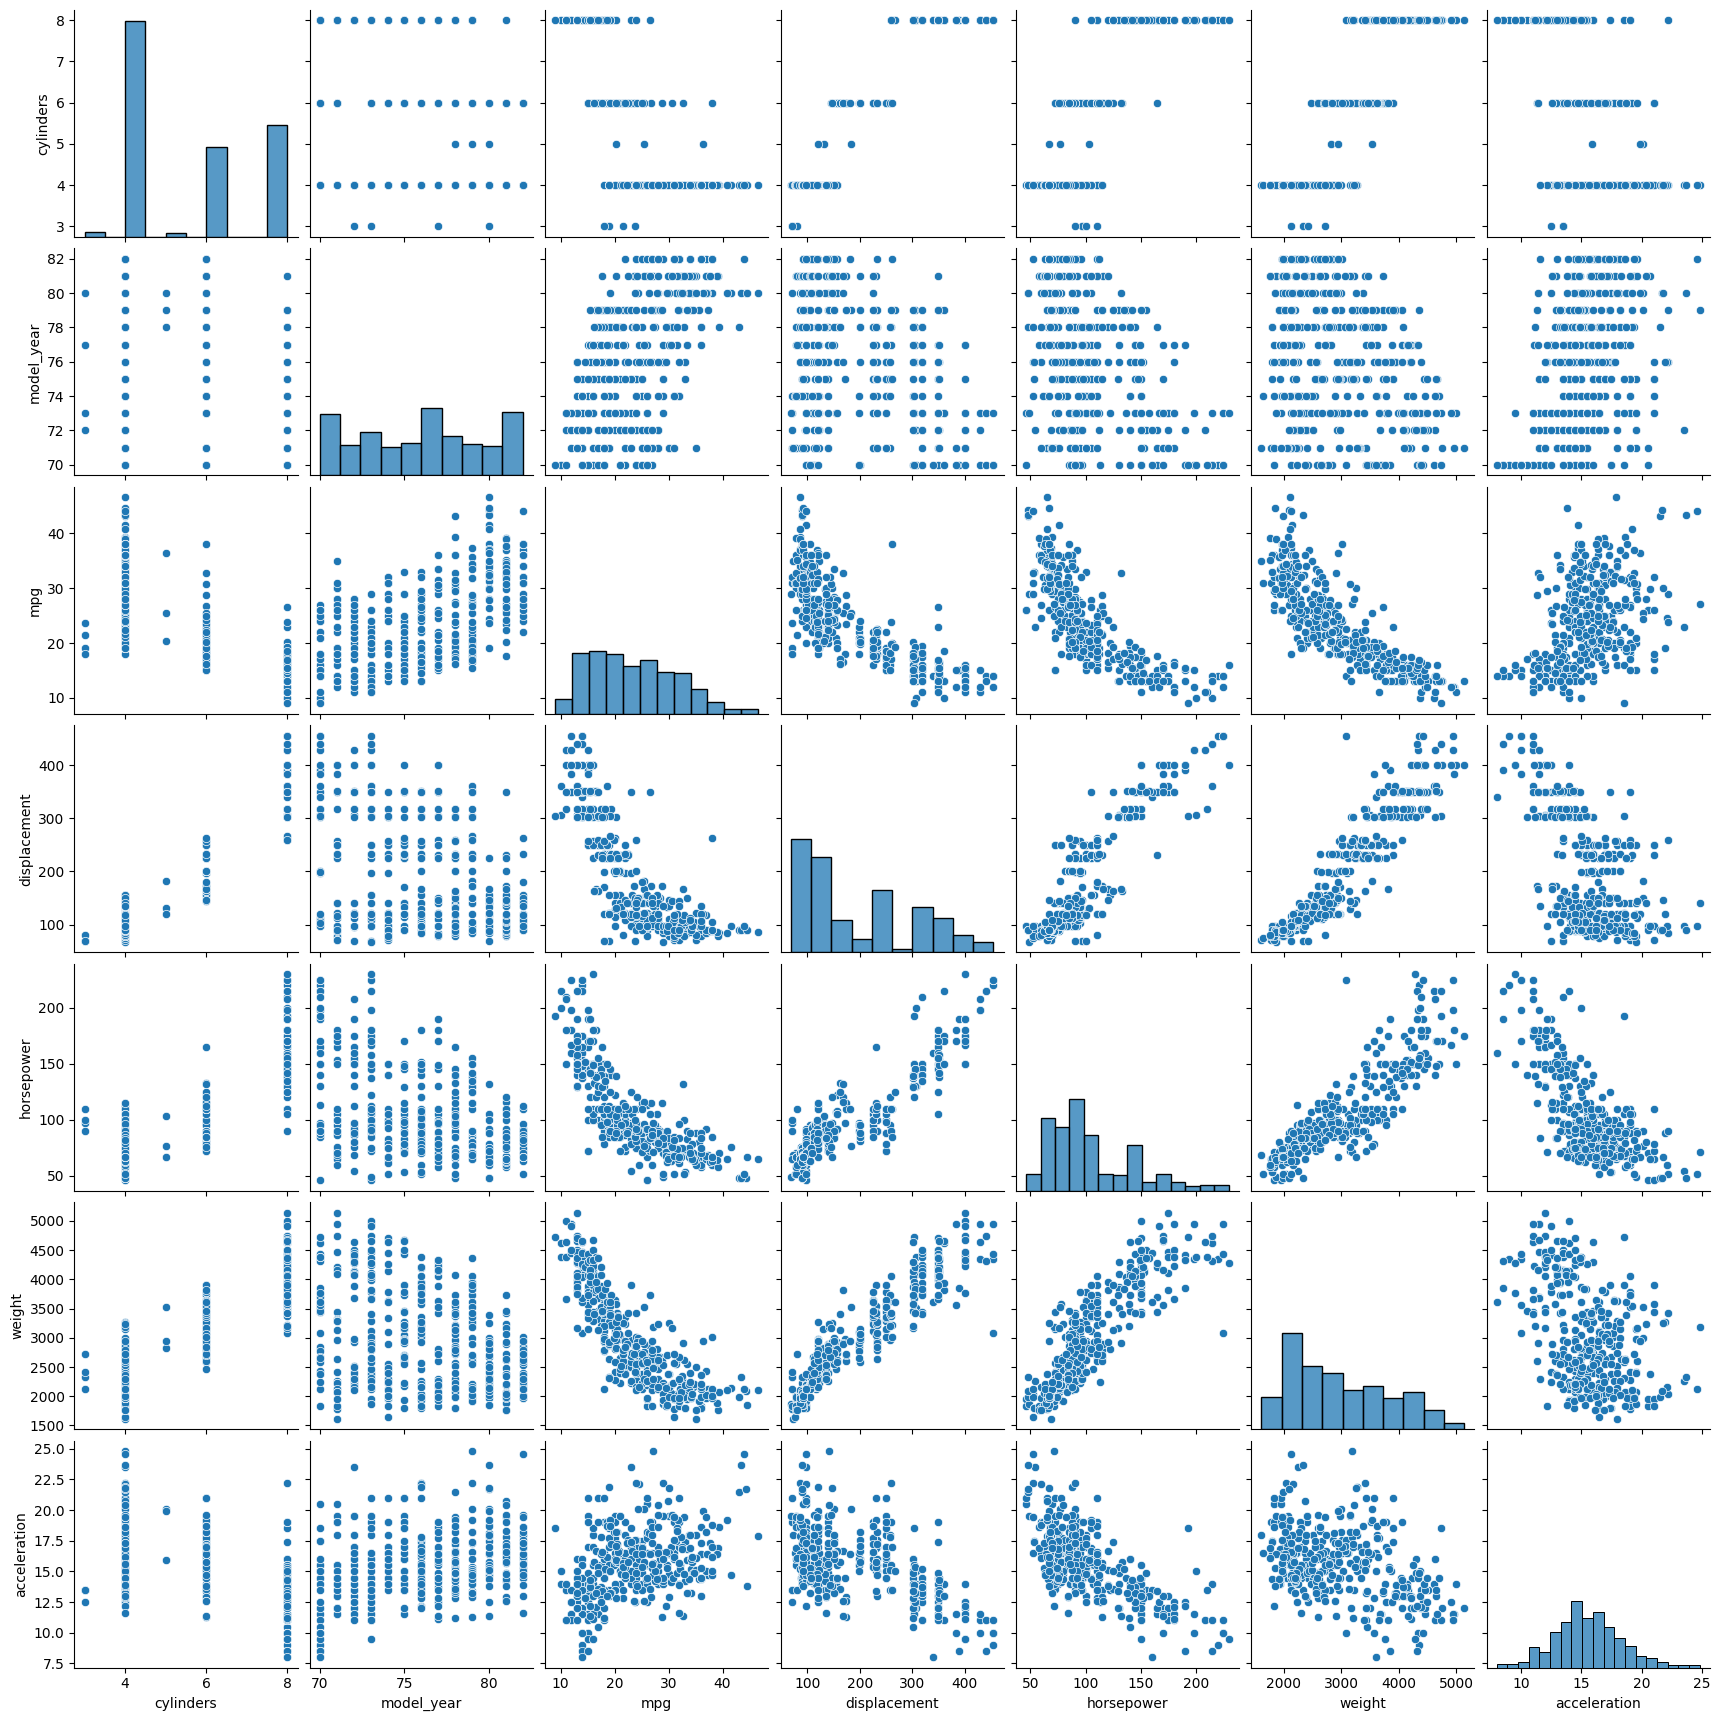

In [131]:
#pairplot
sns.pairplot(df_car)

In [129]:
df_car

,origin,cylinders,model_year,mpg_level,car_company,mpg,displacement,horsepower,weight,acceleration
0,usa,8,70,medium,chevrolet,18.0,307.0,130.0,3504,12.0
1,usa,8,70,low,buick,15.0,350.0,165.0,3693,11.5
2,usa,8,70,medium,plymouth,18.0,318.0,150.0,3436,11.0
3,usa,8,70,low,amc,16.0,304.0,150.0,3433,12.0
4,usa,8,70,medium,ford,17.0,302.0,140.0,3449,10.5
...,...,...,...,...,...,...,...,...,...,...
387,usa,4,82,medium,ford,27.0,140.0,86.0,2790,15.6
388,europe,4,82,high,vw,44.0,97.0,52.0,2130,24.6
389,usa,4,82,high,dodge,32.0,135.0,84.0,2295,11.6
390,usa,4,82,medium,ford,28.0,120.0,79.0,2625,18.6
